Modify so it performs early stopping when the log likelihood does not improve anymore. 

Note that if you log the normal distribution, you will get negative sign. Thus if you ignore the negative sign, it will become negative likelihood, and thus will get smaller and smaller.
Perform plotting every 5 iterations on the resulting clusters.

In [1]:
from scipy.stats import multivariate_normal
import math
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

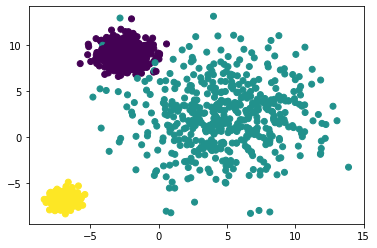

In [3]:
X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 3.5, 0.5], random_state=42)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)

Iteration: 0
NLL smaller?  -36760.54157205294
NLL difference:  36760.54157205294
Iteration: 5
NLL smaller?  -167076.19131834706
NLL difference:  19115.800667699223
Iteration: 10
NLL smaller?  -195767.44589005865
NLL difference:  3052.266376302927
Iteration: 15
NLL smaller?  -206098.33194709205
NLL difference:  1718.7337810202152


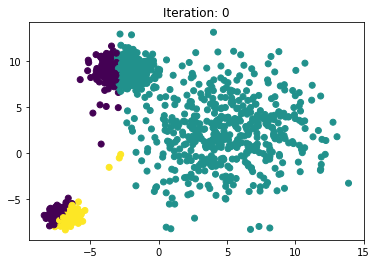

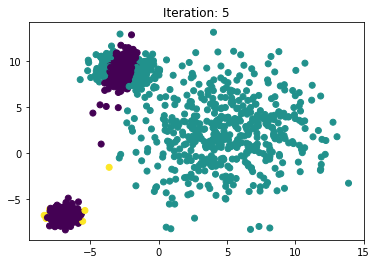

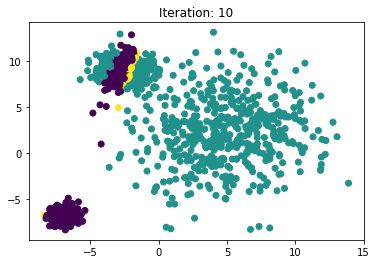

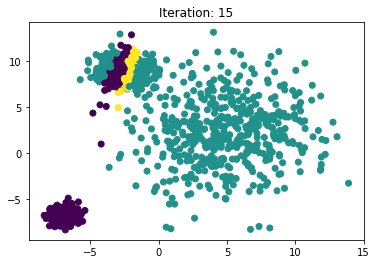

In [4]:

m, n = X.shape
K = 3
max_iter = 20
oldNLL = 0

#initialization


r = np.full(shape=(m, K), fill_value=1/K) #responsibliity


pi = np.full((K, ), fill_value=1/K) #pi #simply use 1/k for pi


random_row = np.random.randint(low=0, high=m, size=K)
mean = np.array([X[idx,:] for idx in random_row ]).T #mean #.T to make to shape (M, K)


cov = np.array([np.cov(X.T) for _ in range (K)]) #covariance

for iteration in range(max_iter):
    
#E step

    
    for i in range(m):
        for k in range(K):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, k], cov=cov[k])
            r[i, k] = pi[k] * xi_pdf #Update r_ik of each sample
        r[i] /= np.sum(r[i])

    NLL = 0
    for i in range(m):
        for k in range(K):
            NLL += math.log(pi[k])
            NLL += multivariate_normal.logpdf(
                X[i], mean=mean[:, k], cov=cov[k])
    
   
    if(iteration % 5 == 0):  #every 5 iteration plot once
        preds = np.argmax(r, axis=1)
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=preds)
        plt.title(f"Iteration: {iteration}")
        print(f"Iteration: {iteration}")
        print("NLL smaller? ", NLL)
        print("NLL difference: ", math.fabs(NLL - oldNLL))
    
    if(math.fabs(NLL-oldNLL) < 5):  #if difference become less than threshold, stop
        print("Final NLL: ", NLL)
        print("final difference: ", math.fabs(NLL - oldNLL)) # math.fabs to show float absolute value
        break
    oldNLL = NLL
    
#M step
   
    NK = np.sum(r, axis=0)
    assert NK.shape == (K, )
    

    pi = NK / m     #PI
    assert pi.shape == (K, )
    
  
    mean =  ( X.T @ r ) / NK   #mean
    assert mean.shape == (n, K)
    
 
    for k in range(K):
        for i in range(m):
            X_mean = (X[i]-mean[:, k]).reshape(-1, 1)
            cov[k] += r[i, k] * (X_mean @ X_mean.T)
        cov[k] /= NK[k]    #covariance (also called Sigma)
    assert cov.shape == (K, n, n)
        

In [5]:
yhat = np.argmax(r, axis=1)#get preds

Text(0.5, 1.0, 'Final')

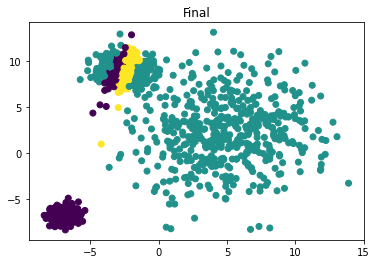

In [6]:

#plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.title("Final")